# 페암 수술 환자의 생존율 예측하기 실습

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import pandas as pd
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

# import data
Data_set = np.loadtxt("https://raw.githubusercontent.com/yblee1223/2022_Winter_AiStudy/main/dataset/ThoraricSurgery.csv", delimiter=",")

# seperate input data & output data
X = Data_set[:, 0:17]
Y = Data_set[:, 17]

# model make
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# learning
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)


Epoch 1/100


2023-01-11 11:28:52.229487: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 0s 580us/step - loss: 11.7674 - accuracy: 0.8511
Epoch 2/100
47/47 [==============================] - 0s 537us/step - loss: 4.0125 - accuracy: 0.7830
Epoch 3/100
47/47 [==============================] - 0s 466us/step - loss: 1.0747 - accuracy: 0.7383
Epoch 4/100
47/47 [==============================] - 0s 476us/step - loss: 0.6134 - accuracy: 0.8149
Epoch 5/100
47/47 [==============================] - 0s 433us/step - loss: 0.5046 - accuracy: 0.8447
Epoch 6/100
47/47 [==============================] - 0s 439us/step - loss: 0.4763 - accuracy: 0.8404
Epoch 7/100
47/47 [==============================] - 0s 459us/step - loss: 0.4751 - accuracy: 0.8447
Epoch 8/100
47/47 [==============================] - 0s 443us/step - loss: 0.4952 - accuracy: 0.8426
Epoch 9/100
47/47 [==============================] - 0s 498us/step - loss: 0.4389 - accuracy: 0.8468
Epoch 10/100
47/47 [==============================] - 0s 482us/step - loss: 0.4572 - accuracy: 0.8447


# 선형회귀
- mse 최소 제곱 오차 

In [19]:
import numpy as np

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

class LinearRegression:
    def __init__(self, x, y):
        self.mx = np.mean(x)
        self.my = np.mean(y)
        self.x = 0
        self.y = 0
    
    def __call__(self, x, y):
        divisor = sum([(i - self.mx)**2 for i in x])
        divided = 0
        for i in range(len(x)):
            divided += (x[i] - self.mx) * (y[i] - self.my)
        self.weight = divided / divisor
        self.bias = self.my - self.mx * self.weight
    def forward(self, x):
        return [self.weight * i + self.bias for i in x]

model = LinearRegression(x, y)
model(x, y)
print("가중치:",model.weight)
print("절편:",model.bias)

가중치: 2.3
절편: 79.0


<function matplotlib.pyplot.show(close=None, block=None)>

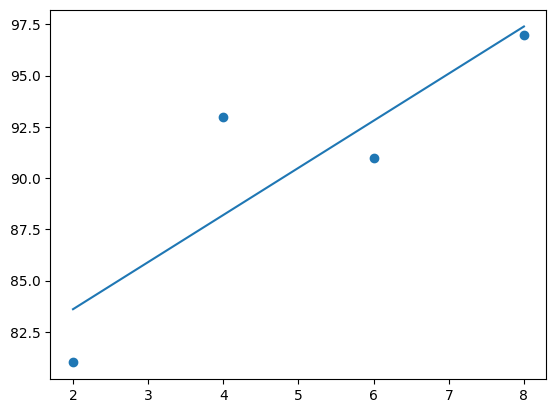

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, model.forward(x))
plt.show

In [12]:
import numpy as np

fake_a_b = [3, 76]

data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

def predict(x):
    return fake_a_b[0] * x + fake_a_b[1]

def mse(y, y_hat):
    return ((y - y_hat) ** 2).mean()

def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부한 시간:{}, 실제 점수:{}, 예측 점수:{}".format(x[i], y[i], predict(x[i])))
print("mse 최종값:", str(mse_val(predict_result, y)))

공부한 시간:2,실제 점수:81, 예측 점수:82
공부한 시간:4,실제 점수:93, 예측 점수:88
공부한 시간:6,실제 점수:91, 예측 점수:94
공부한 시간:8,실제 점수:97, 예측 점수:100
mse 최종값: 11.0
